# Following the Options

Strategy: Buy equity when call open interest goes up (by some amount) after earnings release, and short equity when put open interest goes up after earnings release.

In [1]:
import sys
sys.path.append('../../utils/')

from query import query_dataframe, get_connection
from trading_days import TradingDay

date_format = '%Y-%m-%d'

In [ ]:
import pandas as pd

earnings_dates = pd.read_csv('all_earnings.csv', index_col=0)
earnings_dates['NormDate'] = pd.to_datetime(
    earnings_dates['NormDate'],
    #format="%m-%d-%Y",
    format='%Y-%m-%d',
    errors='coerce'
)

earnings_dates = earnings_dates[(earnings_dates['Date'] > '2011-01-01') &
                                (earnings_dates['Date'] < '2014-01-01')]
earnings_dates['BeforeOpen'] = earnings_dates['BeforeOpen'].astype(bool)

In [ ]:
import sqlalchemy
earnings_dates.to_sql(
    'bcs2149_earnings', get_connection(),
    dtype={
        'Date': sqlalchemy.types.DATE,
        'NormDate': sqlalchemy.types.DATE,
        'Ticker': sqlalchemy.types.VARCHAR
    }
)

In [2]:
%%time
base_query = open('OpenInterestEarnings.sql', 'r').read()
query_example = base_query.format(
    window=4,
    days_prior=1,
    days_after=30,
    tickers=','.join(["'AAPL'", "'MSFT'", "'C'", "'REGN'"])
)

example_earnings = query_dataframe(query_example)

DBAPIError: (_mssql.MSSQLDriverException) Not connected to any MS SQL server

Assuming that does ever finish...

In [10]:
import pandas as pd

oi_1_20 = pd.read_csv('open_interest_1_20.csv', index_col=0)
oi_1_20['OI_Change'] = (oi_1_20['OpenInterest'] - oi_1_20['OpenInterestBefore']) / oi_1_20['OpenInterestBefore']

In [19]:
oi_1_20

Date  Ticker  Expiration  OpenInterest  OpenInterestBefore CallPut  \
0   2013-07-24  AAPL    2013-08-23           9.0                 5.0       P   
1   2013-07-24  AAPL    2013-08-23           9.0                12.0       P   
2   2013-07-24  AAPL    2013-08-23          14.0                 5.0       P   
3   2013-07-24  AAPL    2013-08-23          14.0                12.0       P   
4   2013-07-24  AAPL    2013-08-23          25.0                23.0       C   
5   2013-07-24  AAPL    2013-08-23          25.0               252.0       C   
6   2013-07-24  AAPL    2013-08-23         508.0                23.0       C   
7   2013-07-24  AAPL    2013-08-23         508.0               252.0       C   
0   2013-04-24  AAPL    2013-05-24           0.0                42.0       C   
1   2013-04-24  AAPL    2013-05-24           0.0                82.0       P   
2   2013-04-24  AAPL    2013-05-24         141.0                42.0       C   
3   2013-04-24  AAPL    2013-05-24         248.0                82.0       P   
0   2013-01-24  AAPL    2013-02-22         151.0               150.0       C   
1   2013-01-24  AAPL    2013-02-22         570.0               366.0       P   
0   2011-10-19  AAPL    2011-11-19       13592.0             13814.0       C   
1   2011-10-19  AAPL    2011-11-19       27517.0             26751.0       P   
0   2011-07-20  AAPL    2011-08-20         790.0               793.0       P   
1   2011-07-20  AAPL    2011-08-20       14166.0             15849.0       C   
0   2011-04-21  AAPL    2011-05-21        8530.0              8365.0       P   
1   2011-04-21  AAPL    2011-05-21       37439.0             34618.0       C   
0   2011-01-19  AAPL    2011-02-19        5974.0              4123.0       P   
1   2011-01-19  AAPL    2011-02-19       20153.0             15349.0       C   
0   2013-04-19  MSFT    2013-05-18       15551.0             15344.0       P   
1   2013-04-19  MSFT    2013-05-18      104255.0            102439.0       C   
0   2012-07-20  MSFT    2012-08-18       15554.0             14329.0       P   
1   2012-07-20  MSFT    2012-08-18       28702.0             28759.0       C   
0   2012-01-20  MSFT    2012-02-18        5233.0              3315.0       P   
1   2012-01-20  MSFT    2012-02-18       53901.0             47542.0       C   
0   2011-10-21  MSFT    2011-11-19       15063.0             14383.0       P   
1   2011-10-21  MSFT    2011-11-19       33764.0             32570.0       C   
..         ...     ...         ...           ...                 ...     ...   
0   2012-06-06  FCEL    2012-07-21         225.0               225.0       P   
1   2012-06-06  FCEL    2012-07-21         606.0               606.0       C   
0   2012-03-13  FCEL    2012-04-21         166.0               157.0       P   
1   2012-03-13  FCEL    2012-04-21         892.0               690.0       C   
0   2011-12-13  FCEL    2012-01-21         900.0               900.0       P   
1   2011-12-13  FCEL    2012-01-21        3524.0              3503.0       C   
0   2011-09-07  FCEL    2011-10-22         382.0               407.0       C   
1   2011-09-07  FCEL    2011-10-22         411.0               411.0       P   
0   2011-06-07  FCEL    2011-07-16         482.0               476.0       P   
1   2011-06-07  FCEL    2011-07-16        4784.0              4612.0       C   
0   2011-03-10  FCEL    2011-04-16         390.0               395.0       P   
1   2011-03-10  FCEL    2011-04-16        1336.0              1296.0       C   
0   2012-05-09  INFI    2012-06-16           3.0                 0.0       C   
1   2012-05-09  INFI    2012-06-16         154.0               154.0       P   
0   2011-11-09  INFI    2011-12-17           0.0                 0.0       C   
1   2011-11-09  INFI    2011-12-17           0.0                 0.0       P   
0   2011-05-11  INFI    2011-06-18           0.0                 0.0       C   
1   2011-05-11  INFI    2011-06-18           0.0                 0.0       P   
0   2011-0

In [49]:
import numpy as np
def strategy_diverging(group, threshold=.1):
    if len(group) != 2:
        return np.nan
    # This strategy works as follows:
    # Go long when:
    #    Call Open Interest goes up by more than `threshold` pct
    #    Put Open Interest goes down by more than `threshold` pct
    # Go short when:
    #    Call Open Interest goes down by more than `threshold` pct
    #    Put Open Interest goes down by more than `threshold` pct
    call_oi_change = group[group['CallPut'] == 'C']['OI_Change'].values[0]
    put_oi_change = group[group['CallPut'] == 'P']['OI_Change'].values[0]
    
    if call_oi_change > threshold and put_oi_change < -threshold:
        return ((group['ClosePriceAfter'] - group['ClosePrice']) / group['ClosePrice']).values[0]
    elif put_oi_change > threshold and call_oi_change < -threshold:
        return ((group['ClosePrice'] - group['ClosePriceAfter']) / group['ClosePrice']).values[0]
    else:
        return 0

In [92]:
strategy_results = oi_1_20.groupby(['Date', 'Ticker']).apply(lambda g: strategy_diverging(g, threshold=.02))
results_df = pd.DataFrame(strategy_results, columns=['Result']).reset_index()

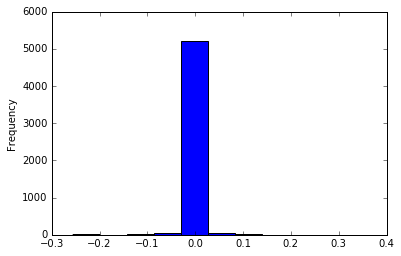

In [93]:
%matplotlib inline
results_df['Result'].plot(kind='hist');

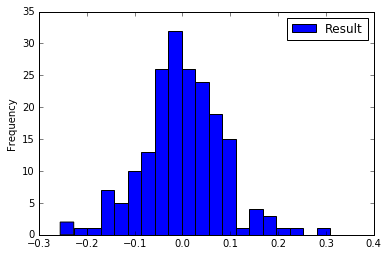

In [94]:
results_df[results_df['Result'] != 0].plot(kind='hist', bins=20);

In [59]:
def strategy_margin(group, margin=.05):
    if len(group) != 2:
        return np.nan
    # This strategy works as follows:
    # Go long when:
    #    Call Open Interest goes up by more than 
    #    Put Open Interest by `margin` pct
    # Go short when:
    #    Put Open Interest goes up by more than
    #    Call Open Interest by `margin` pct.
    # So for example, if Call OI goes up 2%, and Put OI
    # goes up 8%, we go short.
    # If Call OI goes up 2%, and Put OI goes down 8%,
    # we go long.
    call_oi_change = group[group['CallPut'] == 'C']['OI_Change'].values[0]
    put_oi_change = group[group['CallPut'] == 'P']['OI_Change'].values[0]
    
    if (call_oi_change - put_oi_change) > margin:
        return ((group['ClosePriceAfter'] - group['ClosePrice']) / group['ClosePrice']).values[0]
    elif (put_oi_change - call_oi_change) > margin:
        return ((group['ClosePrice'] - group['ClosePriceAfter']) / group['ClosePrice']).values[0]
    else:
        return 0

In [98]:
strategy_results = oi_1_20.groupby(['Date', 'Ticker']).apply(lambda g: strategy_margin(g, margin=.02))
results_df = pd.DataFrame(strategy_results, columns=['Result']).reset_index()

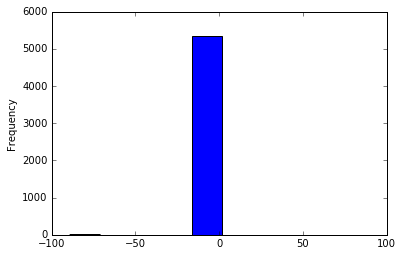

In [99]:
%matplotlib inline
results_df['Result'].plot(kind='hist');

In [100]:
results_df[(results_df['Result'] != 0) & (results_df['Result'].abs() < 1)]['Result'].mean()

-0.0028104488344770206

# Trying to pull data manually for testing

In [101]:
import pandas as pd
earnings_dates = pd.read_csv('all_earnings.csv', index_col=0)

In [107]:
pairs = (earnings_dates.groupby(['Date', 'Ticker'])
         .apply(lambda g: (g['Ticker'].values[0], g['Date'].values[0]))
         .reset_index()[0])

In [113]:
pd.DataFrame(list(pairs), columns=['Ticker', 'Date'])

Ticker        Date
0       CVGW  2011-01-03
1       ANGO  2011-01-04
2       CAMP  2011-01-04
3       LNDC  2011-01-04
4        MOS  2011-01-04
5       NEOG  2011-01-04
6       SONC  2011-01-04
7       TISI  2011-01-04
8         FC  2011-01-05
9       RECN  2011-01-05
10        RT  2011-01-05
11      SHLM  2011-01-05
12       WOR  2011-01-05
13       GPN  2011-01-06
14       MON  2011-01-06
15       MSM  2011-01-06
16       RPM  2011-01-06
17      SCHN  2011-01-06
18       STZ  2011-01-06
19       AZZ  2011-01-07
20       GBX  2011-01-07
21       KBH  2011-01-07
22      PSMT  2011-01-07
23        AA  2011-01-10
24      APOL  2011-01-10
25       AYI  2011-01-10
26      HELE  2011-01-10
27      WDFC  2011-01-10
28       FUL  2011-01-11
29       LEN  2011-01-11
...      ...         ...
19059     NX  2013-12-18
19060   ORCL  2013-12-18
19061   PAYX  2013-12-18
19062    SCS  2013-12-18
19063    ACN  2013-12-19
19064    AIR  2013-12-19
19065    ATU  2013-12-19
19066    CAG  2013-12-19
19067    CCL  2013-12-19
19068   CTAS  2013-12-19
19069    DRI  2013-12-19
19070    KBH  2013-12-19
19071    LUB  2013-12-19
19072    MCS  2013-12-19
19073   NEOG  2013-12-19
19074    NKE  2013-12-19
19075    PIR  2013-12-19
19076    RAD  2013-12-19
19077    RHT  2013-12-19
19078   SCHL  2013-12-19
19079    WGO  2013-12-19
19080    WOR  2013-12-19
19081   FINL  2013-12-20
19082    KMX  2013-12-20
19083    NAV  2013-12-20
19084    WBA  2013-12-20
19085   CAMP  2013-12-23
19086    EBF  2013-12-23
19087   CALM  2013-12-30
19088    BSX  2013-12-31

[19089 rows x 2 columns]